In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

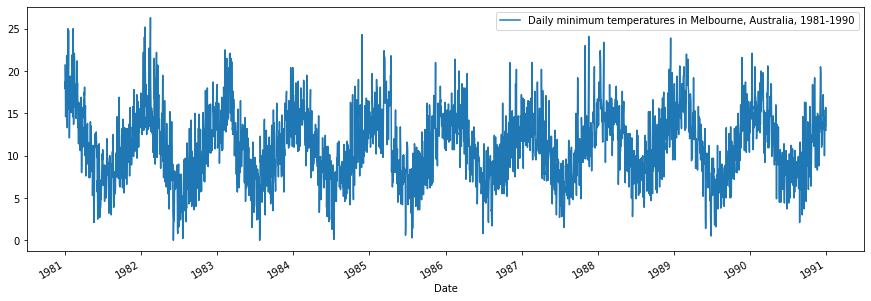

In [0]:
df = pd.read_csv('daily-temp.csv', parse_dates=['Date'], index_col='Date')
df.plot(figsize=(15, 5));

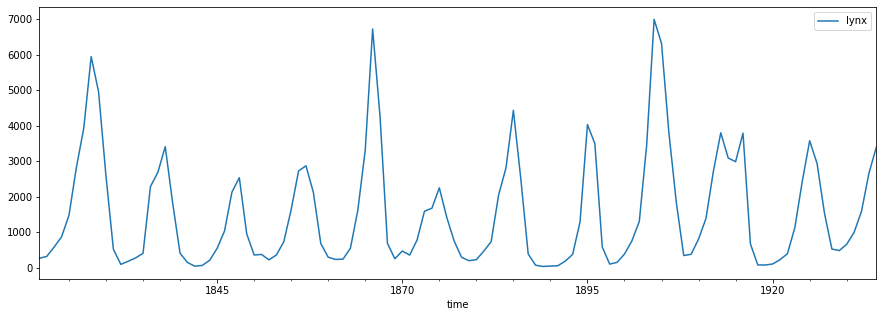

In [0]:
df = pd.read_csv('lynx.csv', parse_dates=['time'], index_col='time')
df.plot(figsize=(15, 5));

In [0]:
df = pd.read_csv('mauna_loa.csv')

In [0]:
df.head()

,year,month,day,decimal,ppm,#days,1 yr ago,10 yr ago,since 1800
0,1974,5,19,1974.3795,333.34,6,-999.99,-999.99,50.36
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.32,5,-999.99,-999.99,49.57
3,1974,6,9,1974.4370,332.18,7,-999.99,-999.99,49.63
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.07


In [0]:
#  Joining columns
df['date'] = df.apply(lambda row: '{}-{}-{}'.format(int(row['year']), int(row['month']), int(row['day'])), axis=1)

df['date'] = pd.to_datetime( df['date'] )
df.index = df['date']

df[['date']].info()
df[['date']].sample(2)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2321 entries, 1974-05-19 to 2018-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2321 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 36.3 KB


,date
date,
1985-11-17,1985-11-17
2017-02-19,2017-02-19


In [0]:
#  Joining columns in a simpler way
df.index = pd.to_datetime(df[['year', 'month', 'day']])

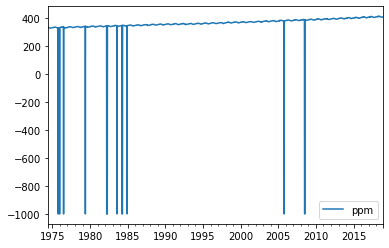

In [0]:
df[ ['ppm'] ].plot();

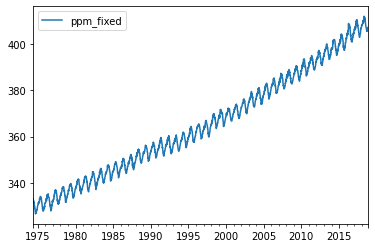

In [0]:
#  Going through all the values ​​and returning nan if x < 0, otherwise return x
df['ppm_fixed'] = df['ppm'].map(lambda x: np.nan if x < 0 else x).fillna( method='backfill')
df[ ['ppm_fixed'] ].plot();

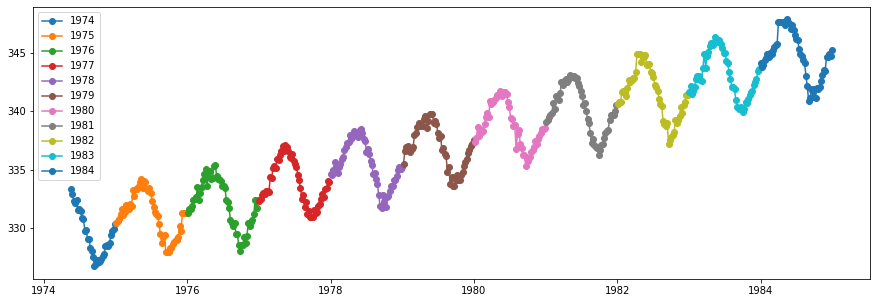

In [0]:
#  Downloading a subset of data for 1974 - 1985
plt.figure(figsize=(15, 5))
for year in range(1974, 1985):
    df_year = df[ df.year == year ]
    plt.plot(df_year.index, df_year['ppm_fixed'], 'o-', label=year)
plt.legend();